In [2]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# input dataset

dataset = pd.read_csv("../Database/advertising.csv")
datasetValues = dataset.values
trainX = np.array([d[:3] for d in datasetValues])
trainY = np.array(dataset['sales'])

In [4]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape = (3, ), activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer = keras.optimizers.Adam(0.003), loss = 'mse', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 6

In [5]:
history = model.fit(trainX, trainY, epochs = 100, validation_split = 0.3)

Epoch 1/100
5/5 [==============================] - 1s 48ms/step - loss: 1544.2317 - accuracy: 0.0000e+00 - val_loss: 117.7731 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 447.5466 - accuracy: 0.0000e+00 - val_loss: 39.6749 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 269.4265 - accuracy: 0.0000e+00 - val_loss: 99.9539 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 248.9709 - accuracy: 0.0000e+00 - val_loss: 49.2452 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 173.9095 - accuracy: 0.0000e+00 - val_loss: 36.7362 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 72.3118 - accuracy: 0.0000e+00 - val_loss: 12.6501 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 112.9768 - accuracy: 0.0000

In [6]:
# 保存整个模型以及 Loss
model.save('../SavedModel/HousePricePredictBP/Model.h5')

los = np.array(history.history['loss'])
los.reshape(los.shape[0])
df = pd.DataFrame(los, columns = ['loss'])
df.to_csv('../SavedModel/HousePricePredictBP/Loss.csv', index = False)

e:\Python\Python3.10\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


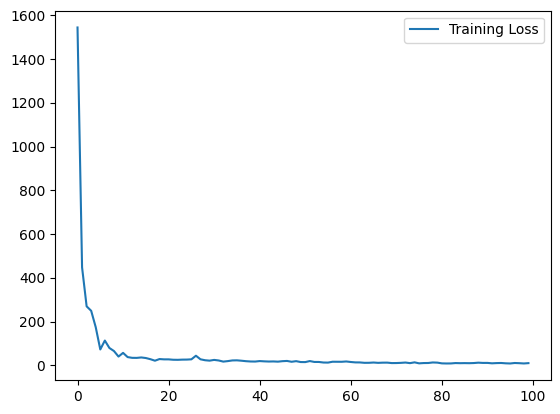

In [7]:
# 绘制 Loss 图像
plt.plot(los, label = 'Training Loss')
plt.legend()
plt.show()

In [8]:
# Use Model
testX = trainX[5 : 30]
testY = trainY[5 : 30]

model.evaluate(trainX, trainY)

predictX = model.predict(testX)
res = [[predictX[i].tolist(), testY[i]] for i in range(predictX.shape[0])]

print(res)

1/1 [==============================] - 0s 86ms/step
[[[8.504444122314453], 17.2], [[13.194533348083496], 16.1], [[3.640174627304077], 5.7], [[6.441838264465332], 11.3], [[4.178926944732666], 9.4], [[12.161591529846191], 17.1], [[1.459306240081787], 4.8], [[6.672677993774414], 7.2], [[14.877482414245605], 22.4], [[7.490501880645752], 13.4], [[6.7974534034729], 11.0], [[6.075965881347656], 10.1], [[11.392335891723633], 16.7], [[8.206189155578613], 12.2], [[6.590023994445801], 12.3], [[5.884456157684326], 10.9], [[13.215653419494629], 18.9], [[13.58494758605957], 20.7], [[4.2295098304748535], 11.9], [[12.321218490600586], 15.0], [[7.90424108505249], 12.9], [[5.870534896850586], 10.5], [[10.635271072387695], 15.9], [[12.736577987670898], 19.6], [[7.9902567863464355], 17.1]]
